In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.metrics import classification_report
import numpy as np
import tensorflow
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import load_model
import joblib
from sklearn.metrics import confusion_matrix
import time
from datetime import datetime

In [ ]:
#created the dataframe from the csv file

In [2]:
df = pd.read_csv("data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [ ]:
#took a look at the distribution of classifications to note an potential imbalances that would skew the accuracy 

In [3]:
df['koi_disposition'].value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

In [ ]:
# Set features. This will also be used as your x values.

In [4]:
target = df['koi_disposition']
target_names = ['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE']
data = df.drop('koi_disposition', axis=1)
feature_names = data.columns
data.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [9]:
#split the data for testing and validation

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2)

In [6]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
946,0,0,1,0,4.988387,2.690000e-05,-2.690000e-05,358.233500,0.003690,-0.003690,...,-192,4.565,0.034,-0.184,0.823,0.238,-0.079,296.43814,46.615360,15.752
3944,0,1,0,0,0.623394,4.100000e-08,-4.100000e-08,131.599128,0.000062,-0.000062,...,-154,4.628,0.053,-0.025,0.639,0.046,-0.061,294.31943,46.619598,16.180
1505,0,0,0,0,6.238535,2.330000e-06,-2.330000e-06,171.706325,0.000295,-0.000295,...,-75,4.280,0.033,-0.030,1.258,0.072,-0.059,286.63840,39.487881,10.734
2148,0,0,0,0,4.761706,3.500000e-06,-3.500000e-06,170.335759,0.000572,-0.000572,...,-117,4.263,0.156,-0.104,1.225,0.194,-0.213,295.11890,48.481281,13.203
5025,0,1,0,0,5.288548,2.470000e-06,-2.470000e-06,135.807213,0.000375,-0.000375,...,-116,2.889,0.228,-0.152,9.169,2.850,-3.484,287.91516,38.640781,11.317


In [ ]:
#Scaled the data

In [11]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_val_scaled = X_scaler.transform(X_val)

In [ ]:
#created the tree model

In [12]:
clf = tree.DecisionTreeClassifier()
clf2 = clf.fit(X_train_scaled, y_train)
print(f"Training Data Score: {clf2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf2.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.838248436103664


In [ ]:
#set the params to be tested by the gridsearch, fit the model to the data, and selected the best results

In [28]:
param_grid = {
    'max_depth': [10,40,80, 90, 100],
    'min_samples_split': [2,4,8, 10, 12],
    'criterion':['gini','entropy'],
    'splitter':['best','random']
}
grid = GridSearchCV(clf, param_grid, verbose=3)

In [29]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] criterion=gini, max_depth=10, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, splitter=best, score=0.879, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_split=2, splitter=best 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, min_samples_split=2, splitter=best, score=0.895, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, splitter=best, score=0.856, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_split=2, splitter=best 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, min_samples_split=2, splitter=best, score=0.870, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, splitter=best, score=0.874, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, splitter=random, score=0.865, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, splitter=random, score=0.837, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, splitter=random, score=0.852, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, splitter=random, score=0.849, total=   0.0s
[CV] criterion=gini, max_depth=10, 

[CV]  criterion=gini, max_depth=40, min_samples_split=2, splitter=best, score=0.887, total=   0.2s
[CV] criterion=gini, max_depth=40, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=40, min_samples_split=2, splitter=best, score=0.862, total=   0.2s
[CV] criterion=gini, max_depth=40, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=40, min_samples_split=2, splitter=best, score=0.849, total=   0.2s
[CV] criterion=gini, max_depth=40, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=40, min_samples_split=2, splitter=best, score=0.843, total=   0.2s
[CV] criterion=gini, max_depth=40, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=40, min_samples_split=2, splitter=random, score=0.866, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=40, min_samples_split=2, splitter=random, score=0.849, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samp

[CV]  criterion=gini, max_depth=80, min_samples_split=2, splitter=best, score=0.851, total=   0.2s
[CV] criterion=gini, max_depth=80, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=80, min_samples_split=2, splitter=best, score=0.874, total=   0.2s
[CV] criterion=gini, max_depth=80, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=80, min_samples_split=2, splitter=best, score=0.863, total=   0.2s
[CV] criterion=gini, max_depth=80, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=80, min_samples_split=2, splitter=best, score=0.843, total=   0.2s
[CV] criterion=gini, max_depth=80, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=80, min_samples_split=2, splitter=best, score=0.852, total=   0.2s
[CV] criterion=gini, max_depth=80, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=80, min_samples_split=2, splitter=random, score=0.857, total=   0.0s
[CV] criterion=gini, max_depth=80, min_samples_

[CV]  criterion=gini, max_depth=90, min_samples_split=2, splitter=best, score=0.845, total=   0.2s
[CV] criterion=gini, max_depth=90, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=90, min_samples_split=2, splitter=best, score=0.871, total=   0.2s
[CV] criterion=gini, max_depth=90, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=90, min_samples_split=2, splitter=best, score=0.861, total=   0.2s
[CV] criterion=gini, max_depth=90, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=90, min_samples_split=2, splitter=best, score=0.847, total=   0.2s
[CV] criterion=gini, max_depth=90, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=90, min_samples_split=2, splitter=best, score=0.848, total=   0.2s
[CV] criterion=gini, max_depth=90, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=90, min_samples_split=2, splitter=random, score=0.856, total=   0.0s
[CV] criterion=gini, max_depth=90, min_samples_

[CV]  criterion=gini, max_depth=100, min_samples_split=2, splitter=best, score=0.843, total=   0.2s
[CV] criterion=gini, max_depth=100, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=100, min_samples_split=2, splitter=best, score=0.869, total=   0.2s
[CV] criterion=gini, max_depth=100, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=100, min_samples_split=2, splitter=best, score=0.862, total=   0.2s
[CV] criterion=gini, max_depth=100, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=100, min_samples_split=2, splitter=best, score=0.850, total=   0.2s
[CV] criterion=gini, max_depth=100, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=100, min_samples_split=2, splitter=best, score=0.852, total=   0.2s
[CV] criterion=gini, max_depth=100, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=100, min_samples_split=2, splitter=random, score=0.853, total=   0.0s
[CV] criterion=gini, max_depth=100, 

[CV]  criterion=entropy, max_depth=10, min_samples_split=2, splitter=best, score=0.880, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_split=2, splitter=best, score=0.881, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_split=2, splitter=best, score=0.865, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_split=2, splitter=best, score=0.884, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_split=2, splitter=best, score=0.877, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_split=2, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_split=2, splitter=random, score=0.857, total=   0.0s
[CV] criterion

[CV]  criterion=entropy, max_depth=40, min_samples_split=2, splitter=best, score=0.872, total=   0.2s
[CV] criterion=entropy, max_depth=40, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=40, min_samples_split=2, splitter=best, score=0.864, total=   0.2s
[CV] criterion=entropy, max_depth=40, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=40, min_samples_split=2, splitter=best, score=0.859, total=   0.3s
[CV] criterion=entropy, max_depth=40, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=40, min_samples_split=2, splitter=best, score=0.860, total=   0.2s
[CV] criterion=entropy, max_depth=40, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=40, min_samples_split=2, splitter=best, score=0.852, total=   0.3s
[CV] criterion=entropy, max_depth=40, min_samples_split=2, splitter=random 
[CV]  criterion=entropy, max_depth=40, min_samples_split=2, splitter=random, score=0.845, total=   0.0s
[CV] criterion

[CV]  criterion=entropy, max_depth=80, min_samples_split=2, splitter=best, score=0.870, total=   0.2s
[CV] criterion=entropy, max_depth=80, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=80, min_samples_split=2, splitter=best, score=0.862, total=   0.2s
[CV] criterion=entropy, max_depth=80, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=80, min_samples_split=2, splitter=best, score=0.870, total=   0.2s
[CV] criterion=entropy, max_depth=80, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=80, min_samples_split=2, splitter=best, score=0.853, total=   0.2s
[CV] criterion=entropy, max_depth=80, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=80, min_samples_split=2, splitter=best, score=0.845, total=   0.2s
[CV] criterion=entropy, max_depth=80, min_samples_split=2, splitter=random 
[CV]  criterion=entropy, max_depth=80, min_samples_split=2, splitter=random, score=0.857, total=   0.0s
[CV] criterion

[CV]  criterion=entropy, max_depth=90, min_samples_split=2, splitter=best, score=0.872, total=   0.2s
[CV] criterion=entropy, max_depth=90, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=90, min_samples_split=2, splitter=best, score=0.855, total=   0.2s
[CV] criterion=entropy, max_depth=90, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=90, min_samples_split=2, splitter=best, score=0.862, total=   0.2s
[CV] criterion=entropy, max_depth=90, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=90, min_samples_split=2, splitter=best, score=0.851, total=   0.2s
[CV] criterion=entropy, max_depth=90, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=90, min_samples_split=2, splitter=best, score=0.854, total=   0.2s
[CV] criterion=entropy, max_depth=90, min_samples_split=2, splitter=random 
[CV]  criterion=entropy, max_depth=90, min_samples_split=2, splitter=random, score=0.858, total=   0.0s
[CV] criterion

[CV]  criterion=entropy, max_depth=100, min_samples_split=2, splitter=best, score=0.865, total=   0.2s
[CV] criterion=entropy, max_depth=100, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=100, min_samples_split=2, splitter=best, score=0.870, total=   0.2s
[CV] criterion=entropy, max_depth=100, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=100, min_samples_split=2, splitter=best, score=0.867, total=   0.2s
[CV] criterion=entropy, max_depth=100, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=100, min_samples_split=2, splitter=best, score=0.852, total=   0.2s
[CV] criterion=entropy, max_depth=100, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=100, min_samples_split=2, splitter=best, score=0.856, total=   0.2s
[CV] criterion=entropy, max_depth=100, min_samples_split=2, splitter=random 
[CV]  criterion=entropy, max_depth=100, min_samples_split=2, splitter=random, score=0.856, total=   0.0s
[CV

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   55.4s finished


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 40, 80, 90, 100],
                         'min_samples_split': [2, 4, 8, 10, 12],
                         'splitter': ['best', 'random']},
             verbose=3)

In [30]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 4, 'splitter': 'best'}
0.8780384671337973


In [ ]:
#created the random forests model

In [15]:
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train_scaled, y_train)
print(f"Training Data Score: {rf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8873994638069705


In [ ]:
#set the params to be tested by the gridsearch, fit the model to the data, and selected the best results

In [16]:
rf2 = RandomForestClassifier()
param_grid2 = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 50, 100, 500]
}
grid2 = GridSearchCV(rf2, param_grid2, verbose=3)

In [17]:
grid2.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.832, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.841, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.818, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.841, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.832, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50, score=0.853, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50, score=0.884, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50, score=0.848, total=   1.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500, score=0.854, total=   4.3s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500, score=0.877, total=   3.7s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=10, score=0.841, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=10, score=0.876, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=10 
[CV] 

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.846, total=   1.0s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.853, total=   0.7s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.869, total=   1.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=500, score=0.858, total=   4.3s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=500 
[CV]  bo

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=50, score=0.853, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=50, score=0.878, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=50, score=0.834, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=50, score=0.845, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=50 
[CV]  bo

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500, score=0.874, total=   3.6s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.838, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.868, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.826, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  bo

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100, score=0.843, total=   0.7s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100, score=0.848, total=   0.7s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100, score=0.862, total=   0.7s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=500 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=500, score=0.855, total=   3.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=500 


[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50, score=0.901, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50, score=0.851, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50, score=0.860, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50, score=0.885, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  b

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=500, score=0.889, total=   4.7s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.854, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.862, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.835, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  bootstra

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.863, total=   0.9s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.887, total=   1.0s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=500, score=0.872, total=   4.6s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=500, score=0.901, total=   4.7s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=500 


[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50, score=0.901, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50, score=0.859, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50, score=0.860, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50, score=0.882, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=500, score=0.887, total=   6.3s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=10, score=0.856, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=10, score=0.878, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=10, score=0.846, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=10 
[CV]  b

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=0.848, total=   0.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=0.880, total=   0.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500, score=0.852, total=   3.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500, score=0.887, total=   3.9s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500 
[CV]  bo

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50, score=0.889, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50, score=0.841, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50, score=0.859, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50, score=0.870, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  b

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=10, score=0.816, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=10, score=0.848, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=10, score=0.825, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=50, score=0.850, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=50 
[CV]  bo

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=500, score=0.860, total=   3.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=500, score=0.885, total=   3.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=500, score=0.843, total=   3.6s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=500, score=0.847, total=   3.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=500 


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.872, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.857, total=   0.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.876, total=   0.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.840, total=   0.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.859, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.849, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.872, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=50, score=0.872, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500, score=0.902, total=   4.7s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500, score=0.860, total=   4.7s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500, score=0.858, total=   4.8s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500, score=0.883, total=   4.7s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=10 
[

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.876, total=   1.0s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.903, total=   1.0s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.852, total=   0.9s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.863, total=   0.9s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bo

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=50, score=0.874, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=50, score=0.895, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=50, score=0.855, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=50, score=0.867, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=50 
[CV]  bo

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, score=0.881, total=   4.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.847, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.882, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.830, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  bo

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100, score=0.852, total=   1.0s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100, score=0.861, total=   1.0s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100, score=0.886, total=   1.0s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=500, score=0.872, total=   4.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=500 


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=50, score=0.847, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=50, score=0.882, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=50, score=0.845, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=50, score=0.851, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=50 


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=500, score=0.852, total=   4.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=500 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=500, score=0.878, total=   3.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.819, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.879, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[C

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.884, total=   0.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.845, total=   0.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.852, total=   0.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.871, total=   0.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimato

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=50, score=0.847, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=50, score=0.875, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=50, score=0.833, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=50, score=0.858, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=50 
[CV]  bo

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=500, score=0.846, total=   3.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=500, score=0.875, total=   3.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=10 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=10, score=0.836, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=10 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=10, score=0.870, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=0.903, total=   1.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=0.860, total=   1.0s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=0.867, total=   1.0s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=0.888, total=   0.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500 


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50, score=0.875, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50, score=0.904, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50, score=0.864, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50, score=0.863, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50 


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=500, score=0.860, total=   4.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=500, score=0.886, total=   4.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10, score=0.839, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10, score=0.871, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10 


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, score=0.898, total=   0.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, score=0.854, total=   0.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, score=0.855, total=   1.0s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, score=0.885, total=   0.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimato

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.856, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.862, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.892, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.858, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50 


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=500, score=0.854, total=   4.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=500 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=500, score=0.857, total=   4.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=500 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=500, score=0.884, total=   4.7s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.828, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.860, total=   0.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.890, total=   0.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.842, total=   0.7s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.852, total=   0.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimato

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50, score=0.853, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50, score=0.884, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50, score=0.844, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50, score=0.860, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50 
[CV]  bo

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=500, score=0.852, total=   3.9s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=500, score=0.874, total=   3.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=10 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=10, score=0.842, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=10 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=10, score=0.861, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, score=0.887, total=   0.7s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, score=0.840, total=   0.7s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, score=0.849, total=   0.7s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, score=0.876, total=   0.7s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50, score=0.842, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50, score=0.881, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50, score=0.848, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50, score=0.858, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50 


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500, score=0.859, total=   5.0s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500, score=0.886, total=   5.0s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=10, score=0.861, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=10, score=0.882, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=10 


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, score=0.903, total=   0.9s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, score=0.852, total=   1.0s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, score=0.865, total=   1.0s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, score=0.886, total=   1.0s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimato

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50, score=0.861, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50, score=0.897, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50, score=0.850, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50, score=0.862, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50 


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=500, score=0.861, total=   4.7s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=500 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=500, score=0.886, total=   4.6s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.870, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.873, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[C

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.903, total=   0.9s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.856, total=   0.9s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.858, total=   0.9s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.888, total=   0.9s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimato

[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed: 34.1min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [10, 50, 100, 500]},
             verbose=3)

In [18]:
print(grid2.best_params_)
print(grid2.best_score_)

{'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 50}
0.8787514727722971


In [ ]:
#created the k nearest neighbors model, ran it with defaul settings 

k: 1, Train/Test Score: 1.000/0.797
k: 3, Train/Test Score: 0.915/0.827
k: 5, Train/Test Score: 0.890/0.836
k: 7, Train/Test Score: 0.880/0.831
k: 9, Train/Test Score: 0.875/0.845
k: 11, Train/Test Score: 0.871/0.834
k: 13, Train/Test Score: 0.865/0.838
k: 15, Train/Test Score: 0.858/0.835
k: 17, Train/Test Score: 0.857/0.838
k: 19, Train/Test Score: 0.854/0.842


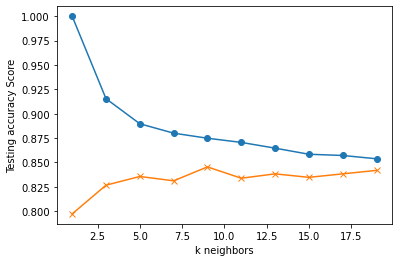

In [19]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")   
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [20]:
knn_f = KNeighborsClassifier(n_neighbors=5)
knn_f.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.842


In [ ]:
#set the params to be tested by the gridsearch, fit the model to the data, and selected the best results

In [21]:
knn = KNeighborsClassifier()
param_grid3 = {
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10,20,30],
    'n_jobs': [-1],
    'n_neighbors': [1,3,5,7,9,11,13,14,15,17,19,21,23,25,27,29],
}
grid3 = GridSearchCV(knn, param_grid3, verbose=3)
grid3.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=1 .....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=1, score=0.817, total=   8.0s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=1 .....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=1, score=0.823, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=1 .....


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.2s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=1, score=0.801, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=1 .....
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=1, score=0.811, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=1 .....
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=1, score=0.793, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=3 .....
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=3, score=0.829, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=3 .....
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=3, score=0.829, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=3 .....
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=3, score=0.829, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=3 .....
[CV]  algo

[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=19, score=0.825, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=19 ....
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=19, score=0.831, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=19 ....
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=19, score=0.818, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=21 ....
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=21, score=0.842, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=21 ....
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=21, score=0.823, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=21 ....
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=21, score=0.825, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=21 ....
[CV]

[CV]  algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=9, score=0.823, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=9 .....
[CV]  algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=9, score=0.842, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=9 .....
[CV]  algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=9, score=0.826, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=11 ....
[CV]  algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=11, score=0.841, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=11 ....
[CV]  algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=11, score=0.837, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=11 ....
[CV]  algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=11, score=0.823, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=11 ....
[CV]  a

[CV]  algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=27, score=0.818, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=27 ....
[CV]  algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=27, score=0.837, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=27 ....
[CV]  algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=27, score=0.816, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=29 ....
[CV]  algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=29, score=0.831, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=29 ....
[CV]  algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=29, score=0.823, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=29 ....
[CV]  algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=29, score=0.820, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=29 ....
[CV]

[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=-1, n_neighbors=15, score=0.822, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=-1, n_neighbors=15 ....
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=-1, n_neighbors=15, score=0.839, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=-1, n_neighbors=15 ....
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=-1, n_neighbors=15, score=0.813, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=-1, n_neighbors=17 ....
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=-1, n_neighbors=17, score=0.842, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=-1, n_neighbors=17 ....
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=-1, n_neighbors=17, score=0.823, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=-1, n_neighbors=17 ....
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=-1, n_neighbors=17, score=0.825, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=-1, n_neighbors=17 ....
[CV]

[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=5, score=0.823, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=5 .......
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=5, score=0.837, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=5 .......
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=5, score=0.823, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=7 .......
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=7, score=0.827, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=7 .......
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=7, score=0.830, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=7 .......
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=7, score=0.826, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=7 .......
[CV]  algorithm=kd_tre

[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=23, score=0.837, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=23 ......
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=23, score=0.816, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=25 ......
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=25, score=0.836, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=25 ......
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=25, score=0.820, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=25 ......
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=25, score=0.821, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=25 ......
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=25, score=0.839, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=25 ......
[CV]  algorithm=

[CV]  algorithm=kd_tree, leaf_size=20, n_jobs=-1, n_neighbors=13, score=0.814, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=20, n_jobs=-1, n_neighbors=14 ......
[CV]  algorithm=kd_tree, leaf_size=20, n_jobs=-1, n_neighbors=14, score=0.838, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=20, n_jobs=-1, n_neighbors=14 ......
[CV]  algorithm=kd_tree, leaf_size=20, n_jobs=-1, n_neighbors=14, score=0.832, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=20, n_jobs=-1, n_neighbors=14 ......
[CV]  algorithm=kd_tree, leaf_size=20, n_jobs=-1, n_neighbors=14, score=0.822, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=20, n_jobs=-1, n_neighbors=14 ......
[CV]  algorithm=kd_tree, leaf_size=20, n_jobs=-1, n_neighbors=14, score=0.847, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=20, n_jobs=-1, n_neighbors=14 ......
[CV]  algorithm=kd_tree, leaf_size=20, n_jobs=-1, n_neighbors=14, score=0.818, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=20, n_jobs=-1, n_neighbors=15 ......
[CV]  algorithm=

[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=1, score=0.793, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=3 .......
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=3, score=0.829, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=3 .......
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=3, score=0.829, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=3 .......
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=3, score=0.829, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=3 .......
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=3, score=0.834, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=3 .......
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=3, score=0.812, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=5 .......
[CV]  algorithm=kd_tre

[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=21, score=0.842, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=21 ......
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=21, score=0.823, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=21 ......
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=21, score=0.825, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=21 ......
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=21, score=0.837, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=21 ......
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=21, score=0.818, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=23 ......
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=23, score=0.838, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=23 ......
[CV]  algorithm=

[CV]  algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=11, score=0.837, total=   0.3s
[CV] algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=11 ........
[CV]  algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=11, score=0.823, total=   0.3s
[CV] algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=11 ........
[CV]  algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=11, score=0.842, total=   0.3s
[CV] algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=11 ........
[CV]  algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=11, score=0.817, total=   0.3s
[CV] algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=13 ........
[CV]  algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=13, score=0.833, total=   0.3s
[CV] algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=13 ........
[CV]  algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=13, score=0.836, total=   0.3s
[CV] algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=13 ........
[CV]  algorithm=brute, leaf_

[CV]  algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=29, score=0.820, total=   0.3s
[CV] algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=29 ........
[CV]  algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=29, score=0.834, total=   0.3s
[CV] algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=29 ........
[CV]  algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=29, score=0.812, total=   0.3s
[CV] algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=1 .........
[CV]  algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=1, score=0.817, total=   0.3s
[CV] algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=1 .........
[CV]  algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=1, score=0.823, total=   0.3s
[CV] algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=1 .........
[CV]  algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=1, score=0.801, total=   0.3s
[CV] algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=1 .........
[CV]  algorithm=brute, leaf_siz

[CV]  algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=17, score=0.835, total=   0.3s
[CV] algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=17 ........
[CV]  algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=17, score=0.818, total=   0.3s
[CV] algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=19 ........
[CV]  algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=19, score=0.839, total=   0.3s
[CV] algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=19 ........
[CV]  algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=19, score=0.819, total=   0.3s
[CV] algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=19 ........
[CV]  algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=19, score=0.825, total=   0.3s
[CV] algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=19 ........
[CV]  algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=19, score=0.831, total=   0.3s
[CV] algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=19 ........
[CV]  algorithm=brute, leaf_

[CV]  algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=7, score=0.825, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=9 .........
[CV]  algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=9, score=0.836, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=9 .........
[CV]  algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=9, score=0.848, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=9 .........
[CV]  algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=9, score=0.823, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=9 .........
[CV]  algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=9, score=0.842, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=9 .........
[CV]  algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=9, score=0.826, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=11 ........
[CV]  algorithm=brute, leaf_size=3

[CV]  algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=27, score=0.836, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=27 ........
[CV]  algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=27, score=0.822, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=27 ........
[CV]  algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=27, score=0.818, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=27 ........
[CV]  algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=27, score=0.837, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=27 ........
[CV]  algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=27, score=0.816, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=29 ........
[CV]  algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=29, score=0.831, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=29 ........
[CV]  algorithm=brute, leaf_

[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  4.5min finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30], 'n_jobs': [-1],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 14, 15, 17, 19,
                                         21, 23, 25, 27, 29]},
             verbose=3)

In [22]:
print(grid3.best_params_)
print(grid3.best_score_)

{'algorithm': 'ball_tree', 'leaf_size': 10, 'n_jobs': -1, 'n_neighbors': 9}
0.8351190447642847


In [ ]:
#created the SVC model

In [23]:
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.352


In [ ]:
#set the params to be tested by the gridsearch, fit the model to the data, and selected the best results

In [24]:
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid4 = GridSearchCV(model, param_grid, verbose=3)

In [25]:
grid4.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.891, total=   1.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.911, total=   1.0s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.869, total=   1.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.879, total=   1.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.887, total=   0.9s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.891, total=   1.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.911, total=   0.9s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.869, total=   1.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.879, total=   1.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.9min finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             verbose=3)

In [26]:
print(grid4.best_params_)
print(grid4.best_score_)

{'C': 10, 'gamma': 0.0001}
0.8878707509420147


In [ ]:
#converted the string type category labels to a matrix of (3,)

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [ ]:
#created the deap learning model with params relevant to the data type

In [ ]:
model2 = Sequential()
model2.add(Dense(units=100, activation='relu', input_dim=40))
model2.add(Dense(units=100, activation='relu'))
model2.add(Dense(units=3, activation='softmax'))
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

In [ ]:
#fit the model to run through the epochs

In [27]:
model2.fit(
    X_train_scaled,
    y_train_categorical,
    validation_split=.15,
    epochs=20,
    shuffle=True,
    verbose=2
)

Epoch 1/20
149/149 - 1s - loss: 0.4846 - categorical_accuracy: 0.8071 - val_loss: 0.3290 - val_categorical_accuracy: 0.8367
Epoch 2/20
149/149 - 0s - loss: 0.2980 - categorical_accuracy: 0.8731 - val_loss: 0.2967 - val_categorical_accuracy: 0.8772
Epoch 3/20
149/149 - 0s - loss: 0.2689 - categorical_accuracy: 0.8889 - val_loss: 0.3292 - val_categorical_accuracy: 0.8784
Epoch 4/20
149/149 - 0s - loss: 0.2586 - categorical_accuracy: 0.8916 - val_loss: 0.2719 - val_categorical_accuracy: 0.8892
Epoch 5/20
149/149 - 0s - loss: 0.2396 - categorical_accuracy: 0.8967 - val_loss: 0.2714 - val_categorical_accuracy: 0.8856
Epoch 6/20
149/149 - 0s - loss: 0.2331 - categorical_accuracy: 0.9017 - val_loss: 0.2626 - val_categorical_accuracy: 0.8939
Epoch 7/20
149/149 - 0s - loss: 0.2215 - categorical_accuracy: 0.9064 - val_loss: 0.2553 - val_categorical_accuracy: 0.9070
Epoch 8/20
149/149 - 0s - loss: 0.2178 - categorical_accuracy: 0.9093 - val_loss: 0.2600 - val_categorical_accuracy: 0.8856
Epoch 9/